In [7]:
import pandas as pd

# Эксперимент 1
exp1 = pd.DataFrame({
    't': [0, 3, 7, 15, 30, 60],
    'C': [3, 2.97, 2.92, 2.87, 2.69, 2.41]
})

# Эксперимент 2
exp2 = pd.DataFrame({
    't': [0, 3, 7, 15, 30],
    'C': [3, 2.72, 2.38, 1.49, 0.02]
})

# Эксперимент 3
exp3 = pd.DataFrame({
    't': [0, 3, 7, 15, 30, 60],
    'C': [3, 2.582124, 2.114064, 1.4171, 0.66939, 0.149361]
})

# Эксперимент 4
exp4 = pd.DataFrame({
    't': [0, 3, 7, 15, 30, 60],
    'C': [3, 2.431753, 1.837879, 1.049813, 0.367369, 0.044987]
})

# Эксперимент 5
exp5 = pd.DataFrame({
    't': [0, 2, 4, 7, 10, 15, 20, 25, 30, 40, 50],
    'C': [3, 2.608075, 2.267351, 1.837879, 1.489756, 1.049813, 0.739791, 0.521322, 0.367369, 0.18243, 0.090592]
})

# Эксперимент 6
exp6 = pd.DataFrame({
    't': [0, 2, 4, 7, 10, 15, 20, 25, 30, 40, 50],
    'C': [3, 1.347987, 0.60569, 0.18243, 0.054947, 0.007436, 0.001006, 0.000136, 1.84E-05, 3.38E-07, 6.18E-09]
})



<lambdifygenerated-237>:2: RuntimeWarning: overflow encountered in exp
  return C1*exp(-k*x)
<lambdifygenerated-249>:2: RuntimeWarning: overflow encountered in exp
  return C1*exp(-k*x)
<lambdifygenerated-255>:2: RuntimeWarning: overflow encountered in exp
  return C1*exp(-k*x)


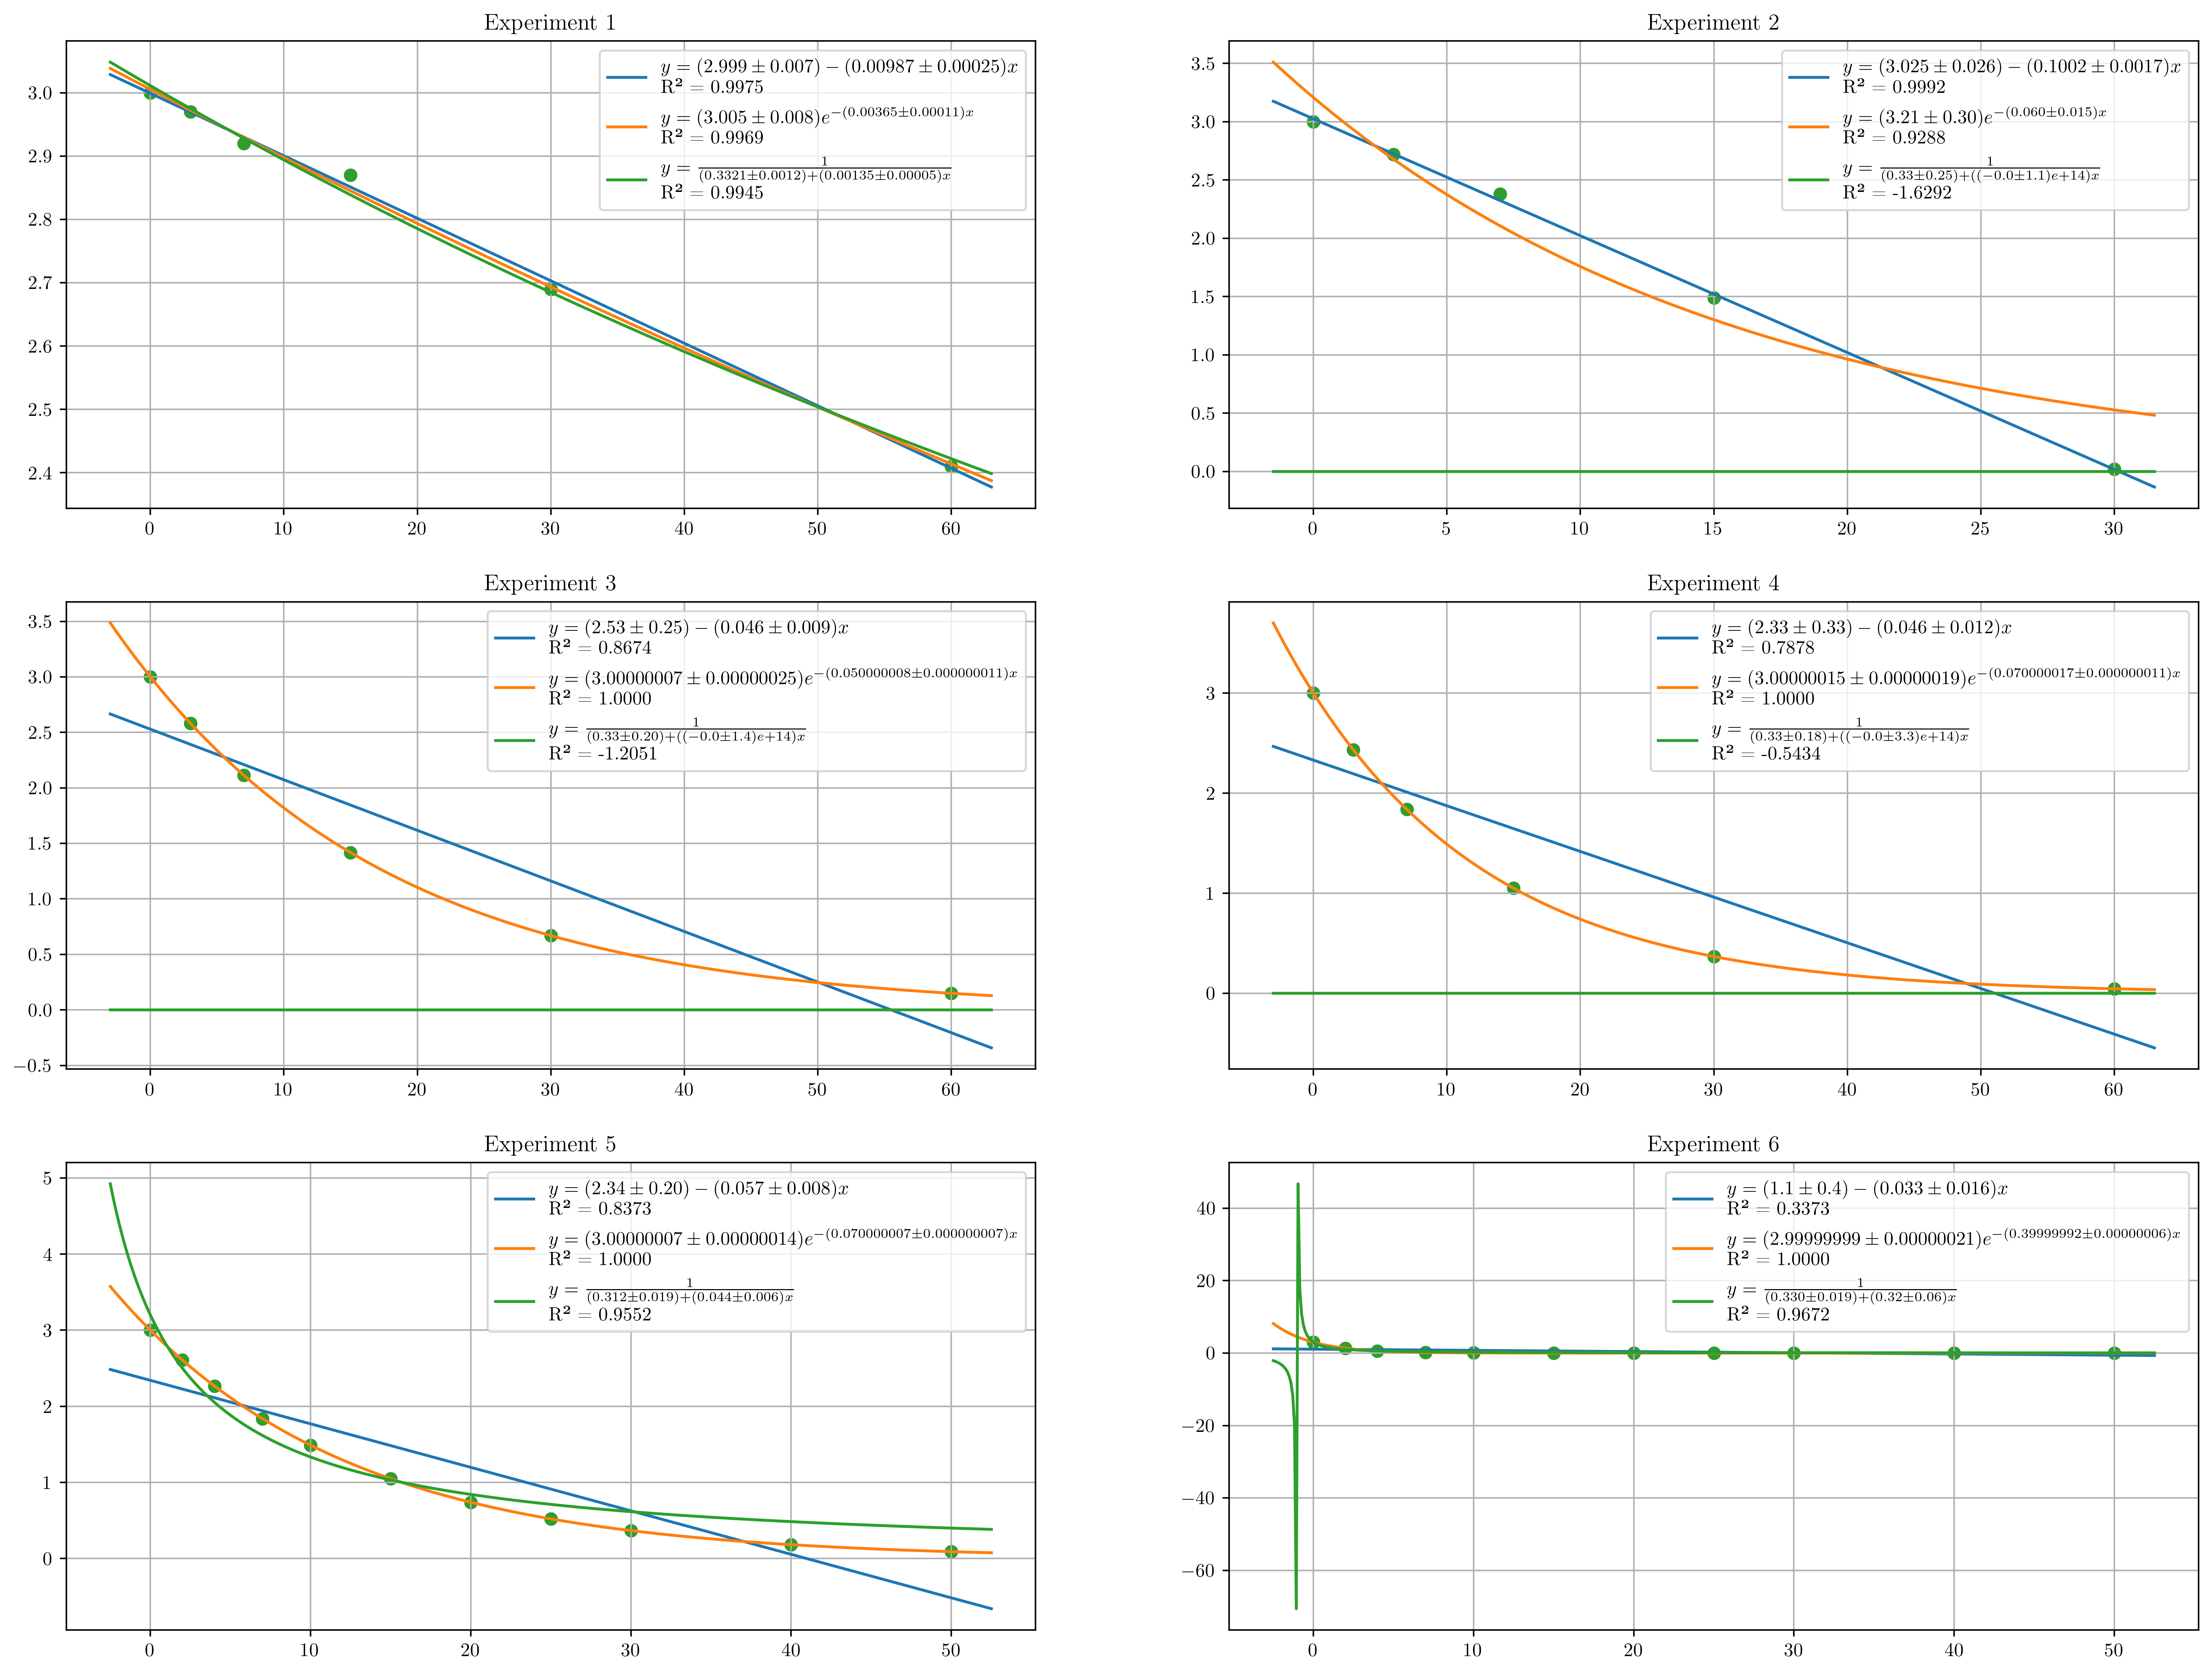

In [9]:
from unc_tools import UncRegression
from unc_tools import *
from sympy import symbols, Function, dsolve, Eq, Derivative, lambdify
from IPython.display import display
from unc_tools import FunctionBase1D
from sympy import exp
import matplotlib.pyplot as plt

x, k, n = symbols("x k n")
y = Function("y")(x)

UncRegression.latex_style()
exps = [exp1, exp2, exp3, exp4, exp5, exp6]

fig, axes = plt.subplots(3, 2, figsize=(20, 15), dpi=400)
axes = axes.flatten()  # Преобразуем в плоский массив для удобства
for idx, exp in enumerate(exps):
    ax = axes[idx]
    exp.to_csv(f"{idx}.csv")
    
    for i in [0, 1, 2]:
        eq = -Derivative(y, x, 1) - k*y**i
        
        sol = dsolve(eq)
        sol = sol[0].rhs if isinstance(sol, list) else sol.rhs
        fun = FunctionBase1D(str(sol))
        
        reg = UncRegression(exp.t, exp.C, func=fun)
        latex = reg.expression.to_latex_expr()
        reg.plot(ax=ax, label=latex, show_coefficients=False)

    ax.set_title(f'Experiment {idx+1}')
    
plt.savefig("test.png")